# Pulsar Emission Data Analysis

In [1]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [2]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [3]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar6 = pd.read_csv("Data/J1644-4559.pulses", sep = ' ', header = None, names = colnames)

In [4]:
pulsar6.shape

(698, 3)

In [5]:
pulsar6.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.634671,0.002761
1,2,0.736945,0.005207
2,3,0.693834,0.002706
3,4,1.021866,0.010184
4,5,0.673845,0.006236
5,6,0.676883,0.004763
6,7,0.527039,0.002422
7,8,0.673417,0.003174
8,9,0.357076,0.002848
9,10,0.661704,0.005588


In [6]:
pulsar6.describe()

,Pulse Number,Brightness,Uncertainty
count,698.00000,698.000000,698.000000
mean,349.50000,0.654319,0.004445
std,201.63953,0.163945,0.001855
min,1.00000,0.007642,0.002129
25%,175.25000,0.555267,0.003086
50%,349.50000,0.658295,0.003951
75%,523.75000,0.753396,0.005349
max,698.00000,1.159334,0.016097


In [7]:
pulsar6["Brightness"].describe()

count    698.000000
mean       0.654319
std        0.163945
min        0.007642
25%        0.555267
50%        0.658295
75%        0.753396
max        1.159334
Name: Brightness, dtype: float64

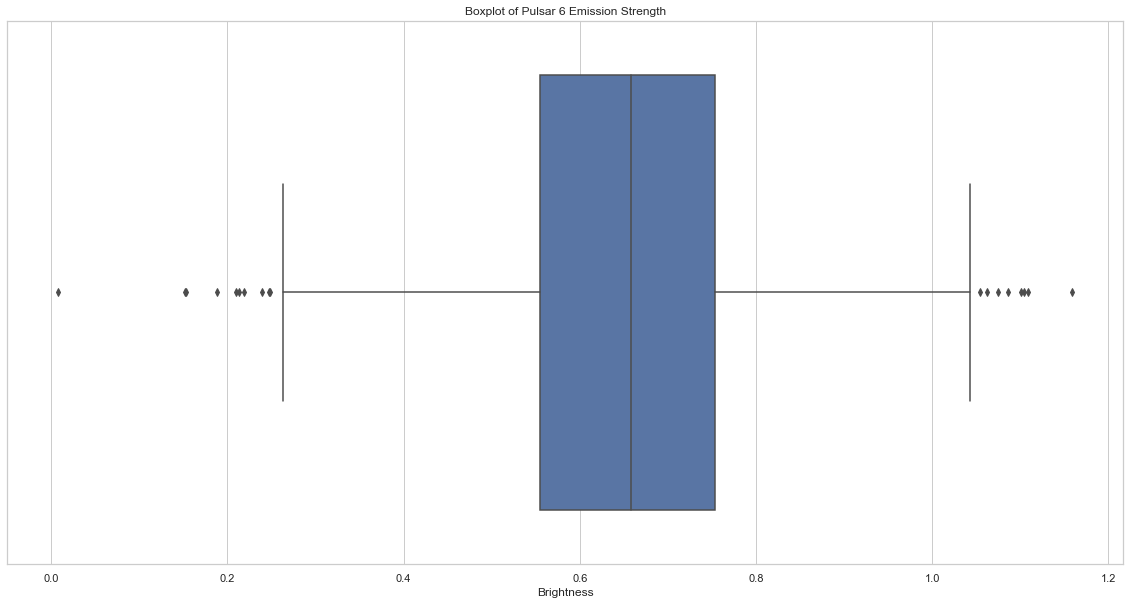

In [8]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [9]:
#numpy method of outlier removal

pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty
0,1,0.634671,0.002761
1,2,0.736945,0.005207
2,3,0.693834,0.002706
3,4,1.021866,0.010184
4,5,0.673845,0.006236
...,...,...,...
693,694,0.776083,0.008928
694,695,0.625382,0.006018
695,696,0.647559,0.003765
696,697,0.312449,0.002901


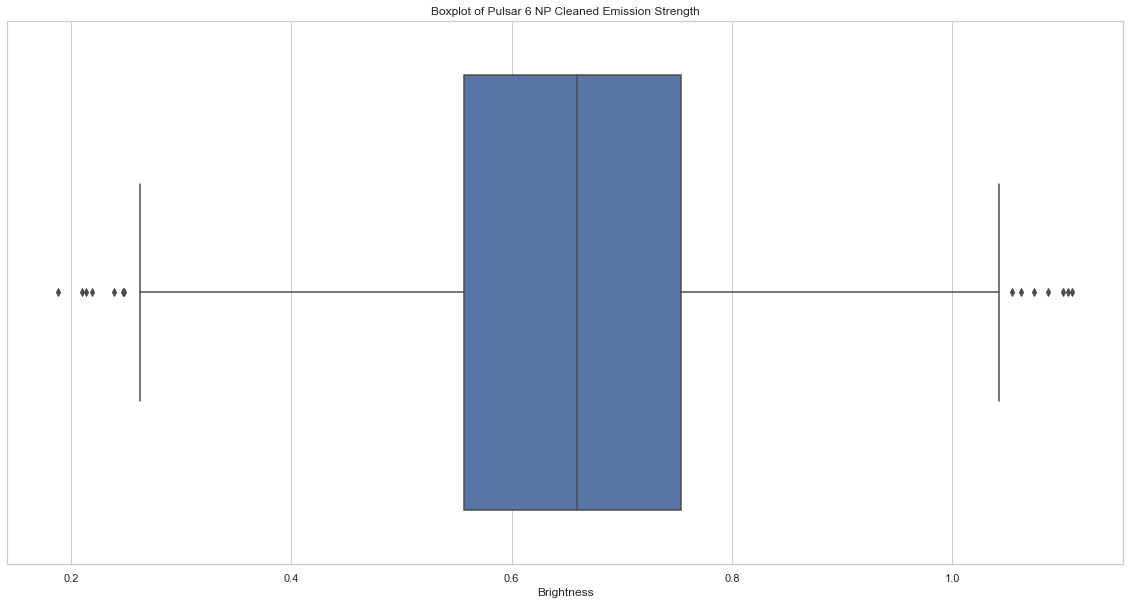

In [10]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6npcleaned["Brightness"]).set_title("Boxplot of Pulsar 6 NP Cleaned Emission Strength")

In [11]:
pulsar6npcleaned["Brightness"].describe()

count    694.000000
mean       0.655970
std        0.159160
min        0.188069
25%        0.556461
50%        0.658903
75%        0.753396
max        1.109122
Name: Brightness, dtype: float64

In [12]:
pulsar6npcleaned["Brightness"].median()

0.6589028

In [13]:
medianpulse6 = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.65829515


In [14]:
pulsar6

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.634671,0.002761,0
1,2,0.736945,0.005207,1
2,3,0.693834,0.002706,1
3,4,1.021866,0.010184,1
4,5,0.673845,0.006236,1
...,...,...,...,...
693,694,0.776083,0.008928,1
694,695,0.625382,0.006018,0
695,696,0.647559,0.003765,0
696,697,0.312449,0.002901,0


In [15]:
median = pulsar6npcleaned["Brightness"].median()
print("Median of Pulsar6 np cleaned: ", median)
pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)

Median of Pulsar6 np cleaned:  0.6589028


C:\Users\oxlay\AppData\Local\Temp/ipykernel_36516/1919336679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)


In [16]:
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.634671,0.002761,0
1,2,0.736945,0.005207,1
2,3,0.693834,0.002706,1
3,4,1.021866,0.010184,1
4,5,0.673845,0.006236,1
...,...,...,...,...
693,694,0.776083,0.008928,1
694,695,0.625382,0.006018,0
695,696,0.647559,0.003765,0
696,697,0.312449,0.002901,0


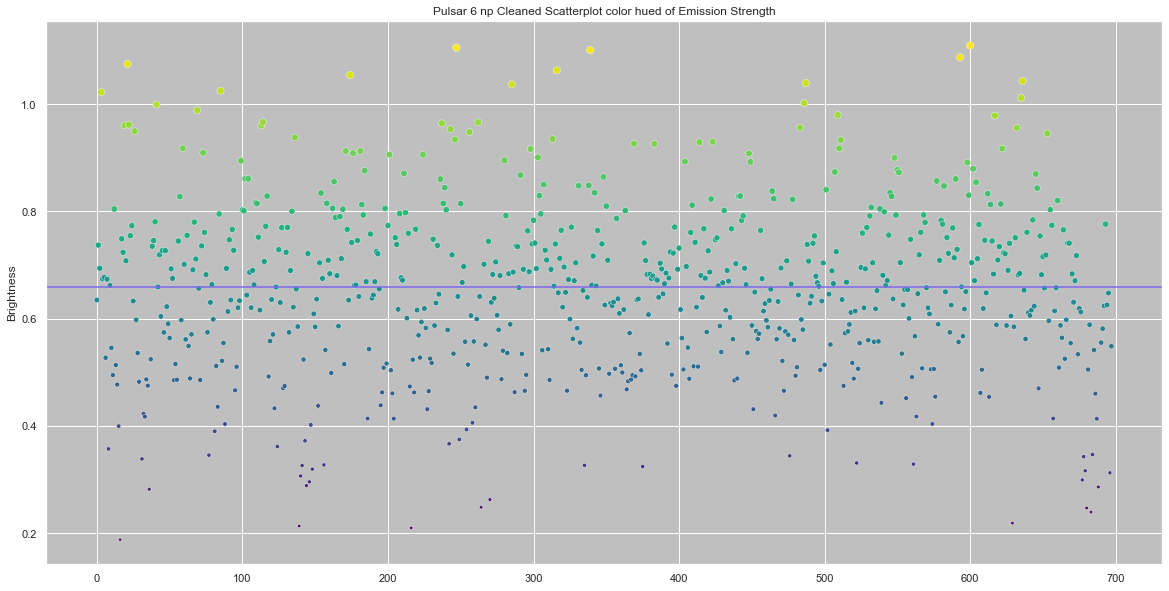

In [17]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.scatterplot(data=pulsar6npcleaned["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-',c='mediumslateblue')

In [18]:
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness > 0.6589028)]))
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness < 0.6589028)]))

347
347


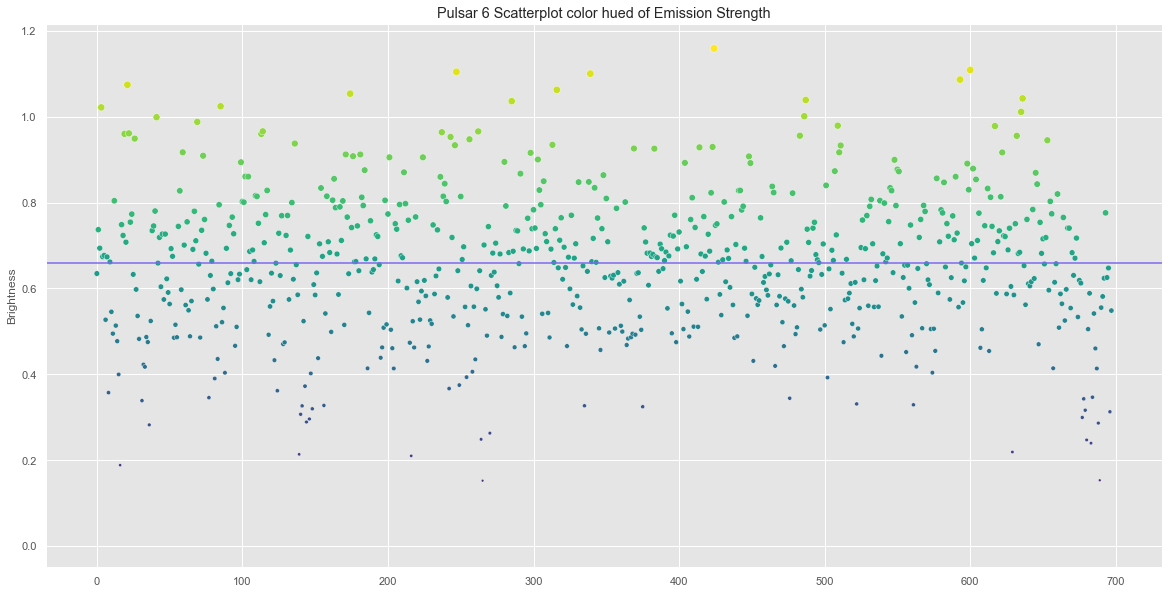

In [19]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [20]:
print(len(pulsar6[(pulsar6.Brightness > 0.6589028)]))
print(len(pulsar6[(pulsar6.Brightness < 0.6589028)]))

348
350


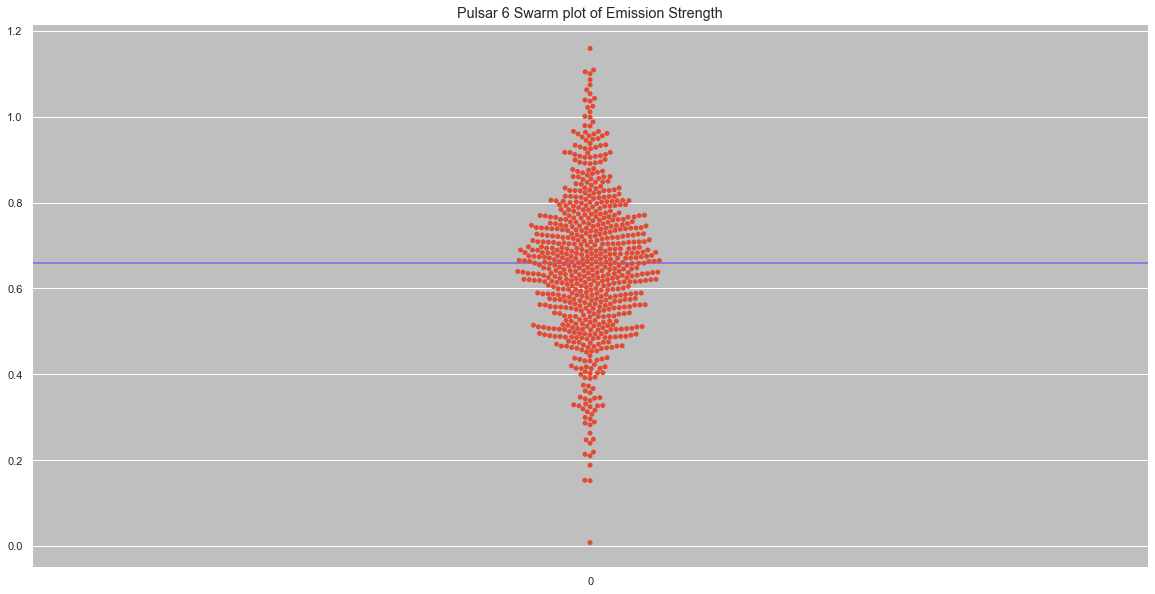

In [21]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


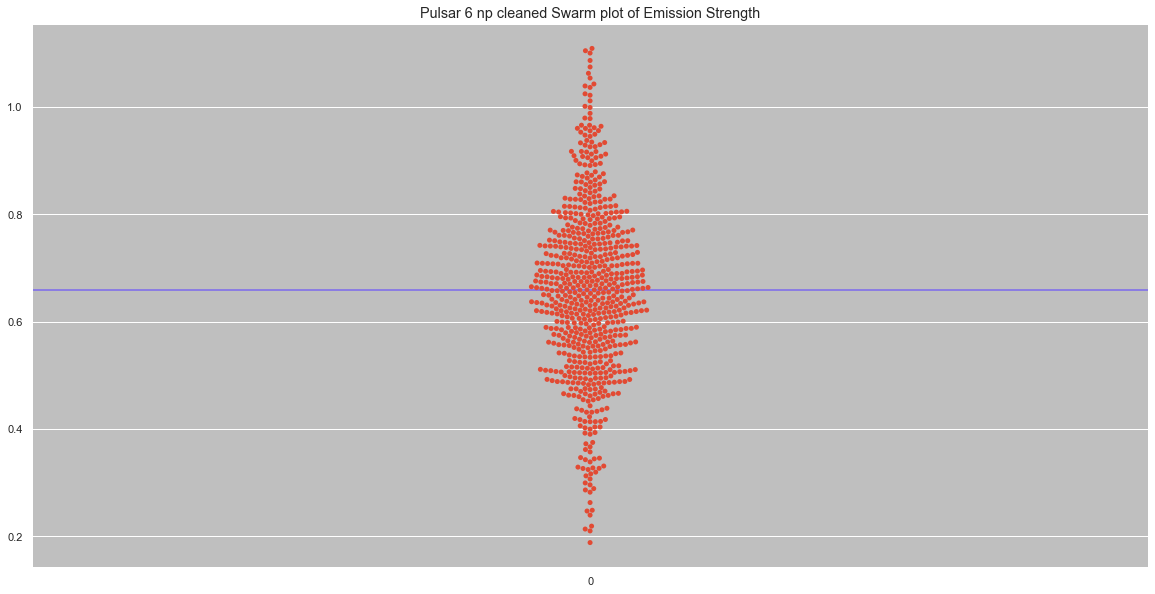

In [22]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.swarmplot(data=pulsar6npcleaned["Brightness"]).set_title('Pulsar 6 np cleaned Swarm plot of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-', c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

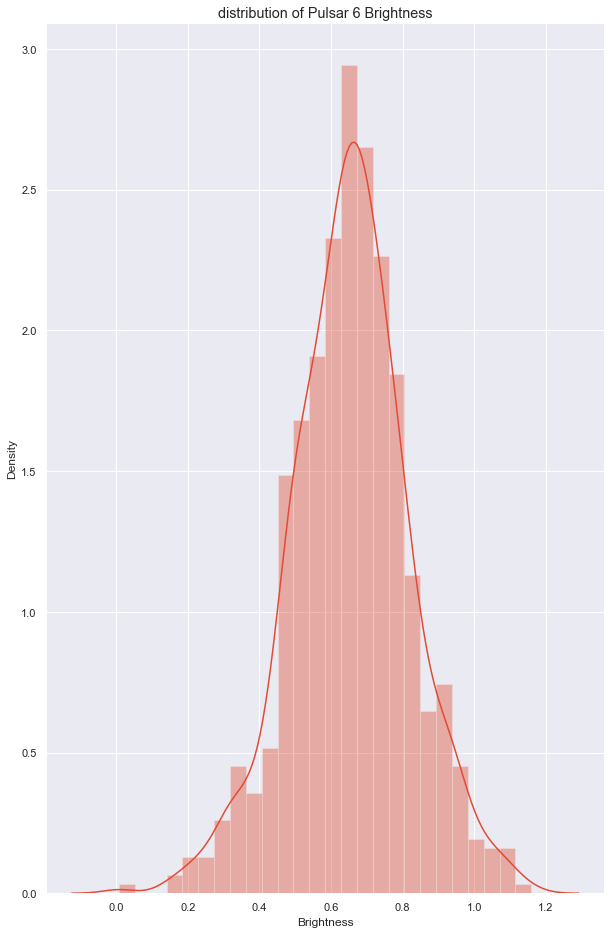

In [23]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

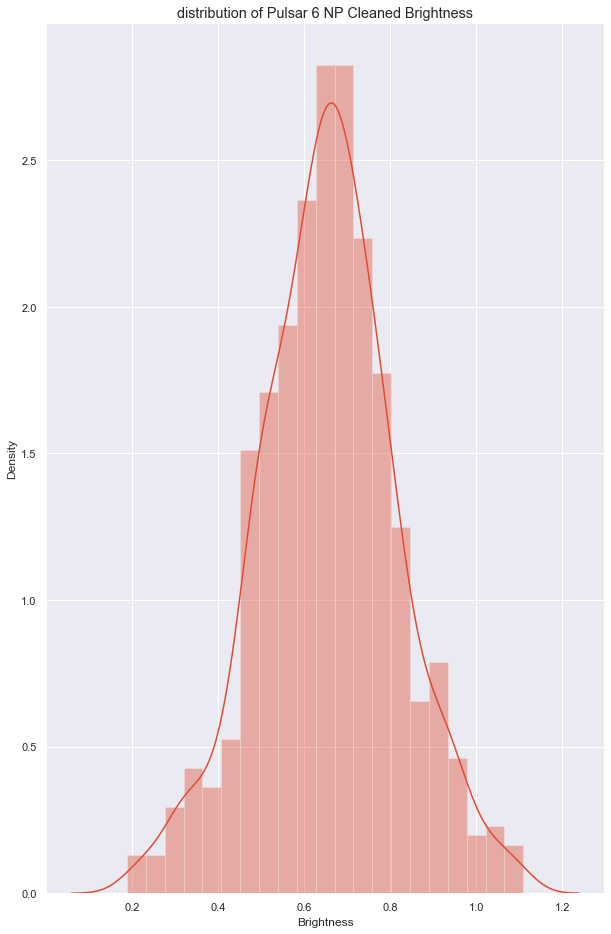

In [24]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Brightness)
plt.title("distribution of Pulsar 6 NP Cleaned Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned binary assignments')

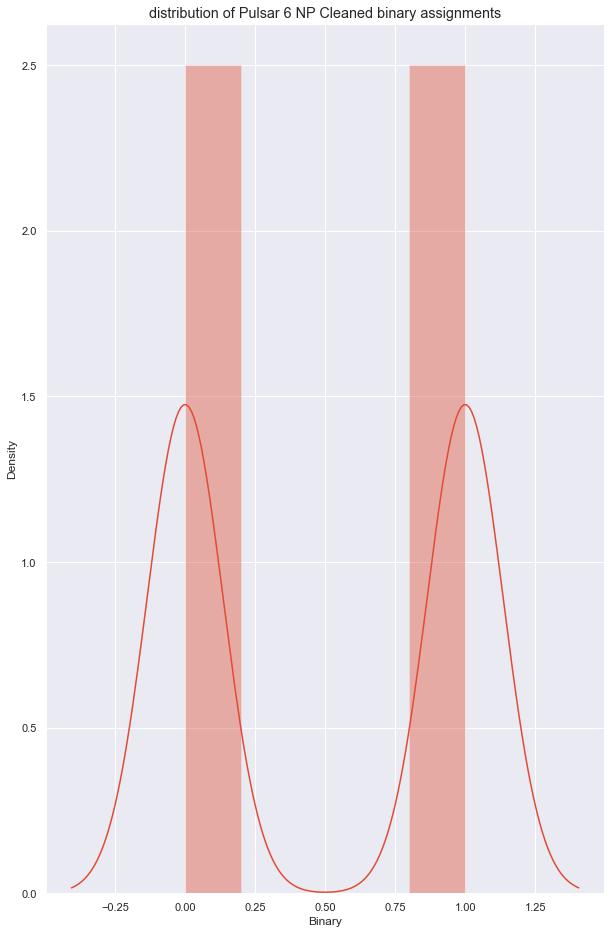

In [25]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Binary)
plt.title("distribution of Pulsar 6 NP Cleaned binary assignments")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

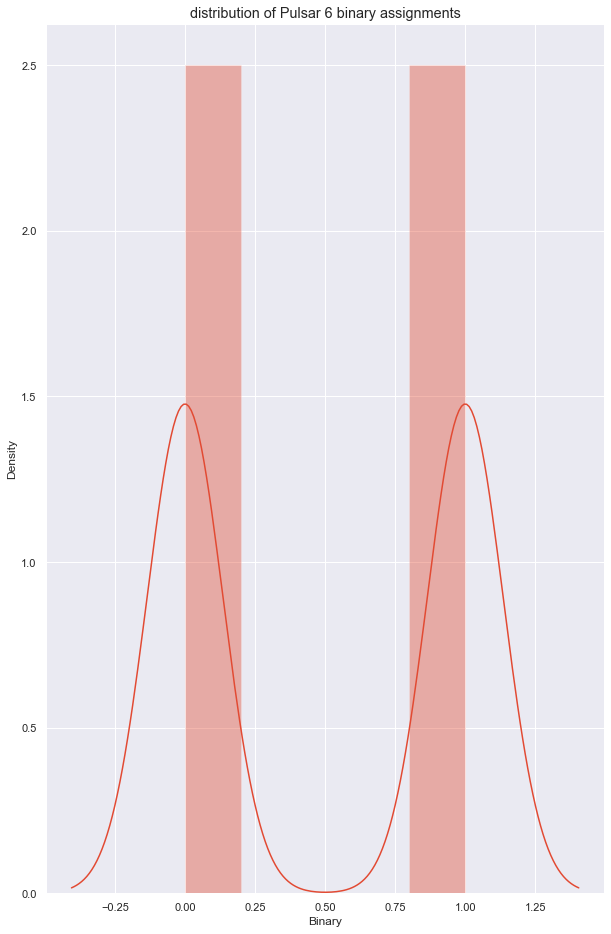

In [26]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST

In [27]:
# MUST BE PASSED A LIST AND A INT/FLOAT 


def runsTest(data, dataMedian):
    runs = 0
    above = 0
    below = 0

    for i in range(len(data)):
        if(data[i] >= dataMedian and data[i-1] < dataMedian) or (data[i] < dataMedian and data[i-1] >= dataMedian):
            runs += 1
        
        if(data[i] >= dataMedian):
            above += 1
        
        else:
            below += 1
    
    R = ((2*above*below)/(above+below))+1
    #sdevTemp = (2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1))
    #sdevTemp = (2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)*2)*(n1+n2-1))
    Sdev = math.sqrt((2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1)))   

    float(Sdev)
    float(R)
    float(runs)
    z = (runs-R)/Sdev
    return z     

In [28]:
binaryData1 = pulsar6['Binary'].tolist()
print("pulsar6 original: ",binaryData1)

binaryData1nooutlier = pulsar6npcleaned['Binary'].tolist()
print("\n pulsar6 original: ", binaryData1nooutlier)

pulsar6 original:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [29]:
print("Brightness Median Test")
Zscore = abs(runsTest(binaryData1, medianpulse6))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

print("Binary Median Test")
binarymedian1 = pulsar6["Binary"].median()

Zscore = abs(runsTest(binaryData1, binarymedian1))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')


print("Removed outliers from dataset")
Zscore = abs(runsTest(binaryData1nooutlier, median))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

Brightness Median Test
Z Statistic is:  4.545328792576532
P Value is :  5.48495657884083e-06
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
Binary Median Test
Z Statistic is:  4.545328792576532
P Value is :  5.48495657884083e-06
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
Removed outliers from dataset
Z Statistic is:  4.558427804288349
P Value is :  5.153797471801667e-06
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.


# Analysis of the preliminary data analysis

We can see here through our printouts the value of both Z Statistic based on the above Runs Test of Randomness and the approximate correlative P-value.

If the conditional prints are not activated it meants there is no statistical significance to reject the $H_{null}$

$ H_{null} $ is where the numbers are randomly generated and sequenced
-
$ H_{alt} $ is where the numbers are not randomly generated or sequenced
-


Further testing can be done with more variety of datasets with pythonic libraries and R librariest such as NIST and Rrandtest (placeholders cant remember their names)


# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

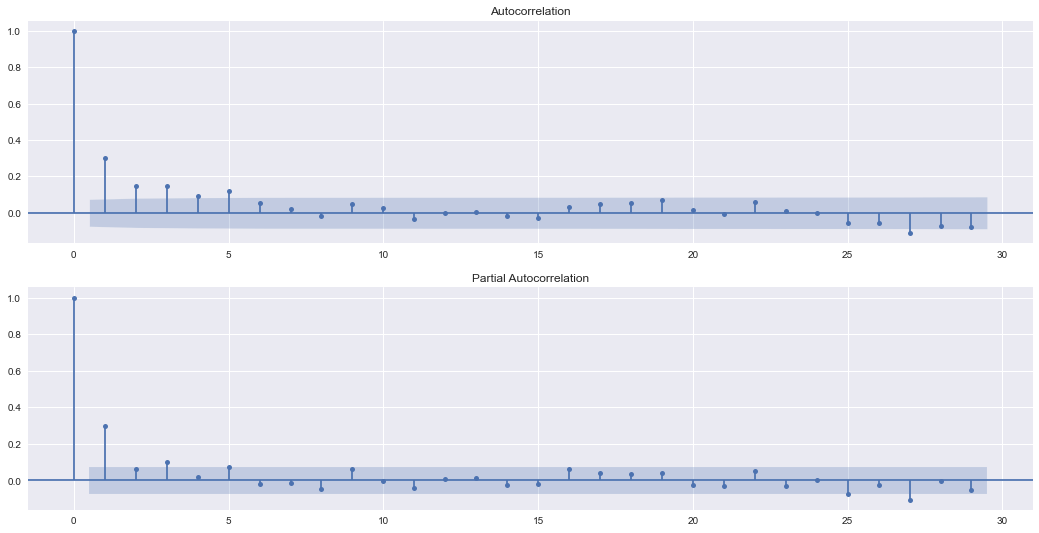

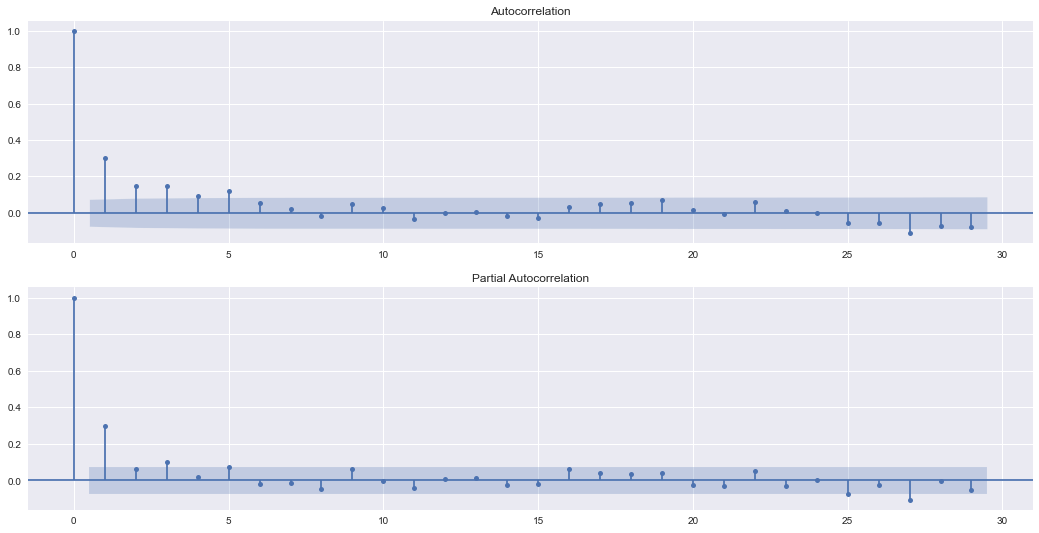

In [30]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar6['Brightness'], ax=ax[0])
plot_pacf(pulsar6['Brightness'], ax=ax[1], method="ols")

In [31]:
acf(pulsar6['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.29929122,  0.14656878,  0.14948301,  0.09384681,
        0.11707783,  0.05493324,  0.02160374, -0.01711482,  0.04777   ,
        0.02563995])

In [32]:
acfpulsar6 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar6[f"B_lag_{lag}"] = pulsar6['Brightness'].shift(lag)


acfpulsar6

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.693834,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.021866,0.693834,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.673845,1.021866,0.693834,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
693,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095,0.541486,0.346502,0.239302
694,0.625382,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095,0.541486,0.346502
695,0.647559,0.625382,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095,0.541486
696,0.312449,0.647559,0.625382,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095


In [33]:
acfpulsar6.corr()["B_lag_0"].values

array([ 1.        ,  0.29938402,  0.14710414,  0.15003691,  0.09455452,
        0.11800036,  0.05537751,  0.02179885, -0.01724535,  0.04863954,
        0.02621294])